In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

realestate = pd.read_csv("./data/Ames Real Estate Data.csv", low_memory = False)
HousePrice = pd.read_csv("./data/Ames_HousePrice.csv")

Current working directory: /Users/chereowang27/NYCDSA/Machine_Learning_I/Machine_Learning_Project/Ames_Housing_ML


In [2]:
realestate = pd.DataFrame(realestate)
HousePrice = pd.DataFrame(HousePrice)

In [4]:
print(realestate.shape)
print(HousePrice.shape)

(22213, 91)
(2580, 82)


In [5]:
realestate.describe()
HousePrice.describe()
print("realestate columns: ",realestate.columns)
print("HousePrice columns: ", HousePrice.columns)
HousePrice.columns.intersection(realestate.columns)

realestate columns:  Index(['MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr', 'ZngCdPr',
       'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S', 'ClassSc_S', 'Legal_Pr',
       'SchD_S', 'TxD_S', 'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
       'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2', 'Rcrd_Yr', 'Rcrd_Mo',
       'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr', 'LndAc_S', 'ImpAc_S',
       'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
       'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
       'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
       'AcreX_S1', 'AcreGr', 'AcreNt_S', 'Neighborhood', 'LotArea', 'ParType',
       'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle',
       'Foundation', 'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating',
       'Central Air', 'GLA', 'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces',
       'PoolArea', 'GarageType', 'GarYrBlt', 'Cars', 'GarageArea',
       'YrSold_

Index(['SalePrice', 'LotArea', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofMatl', 'MasVnrType', 'Foundation', 'Heating', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageArea', 'PoolArea', 'SaleType'],
      dtype='object')

In [16]:
# HousingPrice data
# PID
#Property Location:
#                     'MSSubClass', 'MSZoning','Neighborhood'
#
#House attributes:
#                 'GrLivArea', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
#        'Utilities', 'LotConfig', 'LandSlope', 'Condition1',
#        'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
#        'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
#        'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
#        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
#        'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
#        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
#        '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
#        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
#        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
#        'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
#        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
#        'Fence', 'MiscFeature', 'MiscVal'
#
#Sale info: 
#           'SalePrice', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'

In [17]:
# check in realestate data
# owner info: 
#            'MA_Ownr1', 'MA_Ownr2', 'MA_Line1', 'MA_Line2',
#             'MA_City', 'MA_State', 'MA_Zip1', 'MA_Zip2','Rcrd_Yr', 'Rcrd_Mo',
#              'Inst1_No', 'Inst1_Yr', 'Inst1_Mo', 'Inst1TPr'
# Property Location: 
#              'MapRefNo', 'GeoRefNo', 'Tier', 'Range', 'Prop_Addr','ZngCdPr',
#              'ZngCdSc', 'ZngOLPr', 'ZngOLSc', 'ClassPr_S','Legal_Pr',
#               'SchD_S', 'TxD_S'
# House attributes: 
#               'LndAc_S', 'ImpAc_S',
#               'OthAc_S', 'TtlVal_AsrYr', 'ValType', 'X1TPr_D', 'X1TSc_D', 'X2TPr_D',
#               'X2TSc_D', 'X1TPr_S', 'X1TSc_S', 'X2TPr_S', 'X2TSc_S', 'LndAcX1S',
#               'ImpAcX1S', 'ImpAcX2S', 'HSTtl_D', 'MilVal_D', 'HSTtl_S', 'MilVal_S',
#               'AcreX_S1', 'AcreGr', 'AcreNt_S','Neighborhood', 'LotArea', 'ParType',
#               'BldgNo_S', 'DwlgNo_S', 'BldgType', 'YrBuilt', 'HouseStyle','Foundation', 
#               'RoofMatl', 'Ext1', 'Ext2', 'MasVnrType', 'Heating','Central Air', 'GLA', 
#               'TtlBsmtSF', 'TotRmsAbvGrd', 'Fireplaces','PoolArea', 'GarageType', 'GarYrBlt', 
#                'Cars', 'GarageArea',
# sale info: 'YrSold_YYYY', 'MoSold_MM', 'SalePrice', 'SaleType', 'SaleCond',
#        'ParclRel', 'PA-Nmbr', 'PA-PreD', 'PA-Strt', 'PA-StSfx', 'PA-PostD',
#        'PA-UnTyp', 'PA-UntNo', 'Date', 'Source', 'NmbrBRs'
    


In [124]:
cols = HousePrice.columns
num_cols = HousePrice._get_numeric_data().columns
num_cols
num_df = HousePrice[list(set(num_cols) - set(['PID', 'Unnamed:0']))]

<AxesSubplot:>

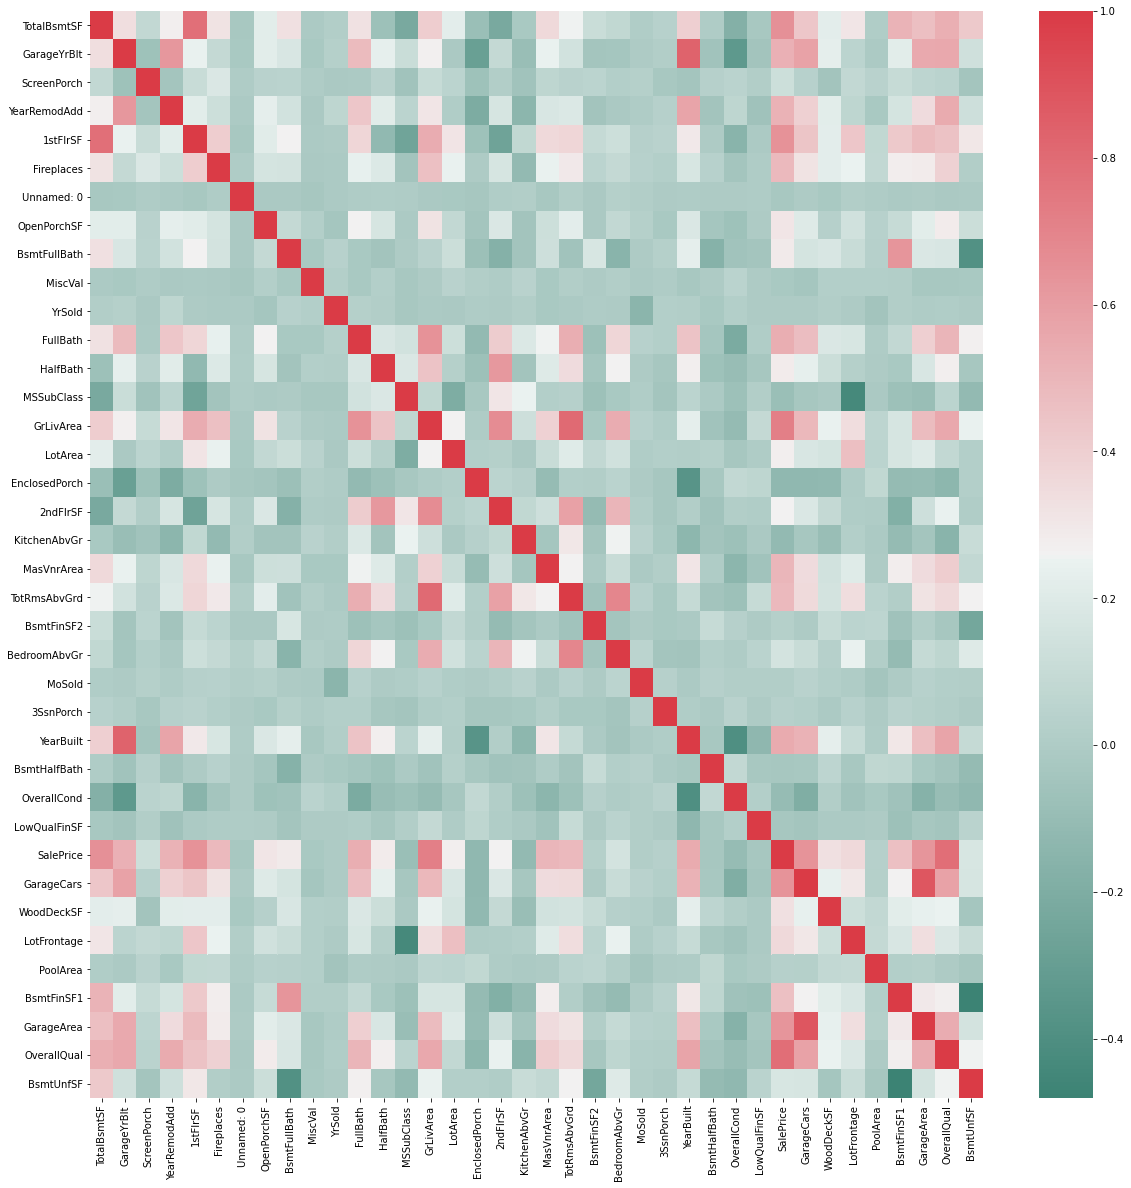

In [145]:
#correlation matrix of numeric variables
fig = plt.figure(figsize =(20,20))
ax = fig.add_subplot(111)
#cmap = sns.color_palette("coolwarm", as_cmap = True)
cmap = sns.diverging_palette(170,10,as_cmap = True)
corr = num_df.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, 
                  yticklabels = corr.index.values,
                  cmap = cmap)




In [91]:
categorical = list(set(cols) - set(num_cols))


In [8]:
for feature in categorical: 
    print(HousePrice[feature].value_counts())
    print('')

GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    251
LwQ    139
Name: BsmtFinType1, dtype: int64

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
AsphShn      2
CBlock       2
PreCast      1
ImStucc      1
Name: Exterior1st, dtype: int64

TA    2316
Gd     101
Fa      88
Ex       3
Po       3
Name: BsmtCond, dtype: int64

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64

AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64

Y    2417
N     163
Name: CentralAir, dtype: int64

TA    3
Fa    2
Ex    2
Gd    2
Name: PoolQC, dtype: int64

WD       2392
New        79
COD        50
ConLD      23
CWD        11
ConLw       8
ConLI       7
Con         5
Oth         4
VWD         1
Name: SaleType, dtype: int64

VinylSd    856
MetalSd    404
HdBoard    380
Wd Sdng    369
Plywood    238
CmentBd     

In [9]:
missingRows = HousePrice.isnull().any(axis = 1)
missingCols = HousePrice.isnull().any(axis = 0)
HousePrice.columns[missingCols]


Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [80]:
prop_miss

,Variable,Proportion missing
0,PoolQC,0.996512
1,MiscFeature,0.962403
2,Alley,0.934884
3,Fence,0.796512
4,FireplaceQu,0.481008
5,LotFrontage,0.179070
6,GarageFinish,0.050000
7,GarageQual,0.050000
8,GarageYrBlt,0.050000
9,GarageCond,0.050000


Text(0.5, 1.0, 'Proportion of Missing Values')

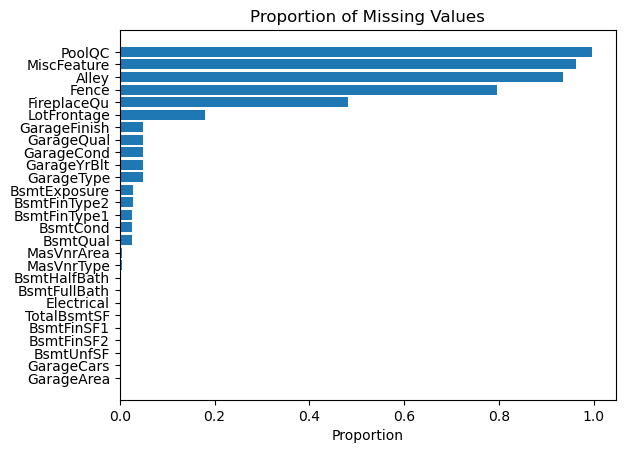

In [81]:
prop_miss = HousePrice.isna().mean().sort_values()
prop_miss = prop_miss[prop_miss>0].reset_index()
prop_miss.columns = ["Variable","Proportion missing" ]
plt.rcdefaults()
fig,ax = plt.subplots()

ax.barh(prop_miss["Variable"], prop_miss["Proportion missing"])
ax.set_xlabel("Proportion")
ax.set_title("Proportion of Missing Values")


In [43]:
#check if there are any duplicated data
print('duplicated in realestate: {}'.format(realestate.duplicated().sum()))
print('duplicated in HousePrice: {}'.format(HousePrice.duplicated().sum()))

#keep only unique rows in realestate data
realestate = realestate.drop_duplicates()
realestate.shape

duplicated in realestate: 5
duplicated in HousePrice: 0


(22208, 91)

In [85]:
realestate.loc[realestate.duplicated('MapRefNo', keep = False), ]

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
43,522105010,522105010,0,0,1407 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1407,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
44,522105010,522105010,0,0,1407 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1407,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
54,522105110,522105110,0,0,1711 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1711,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
55,522105110,522105110,0,0,1711 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1711,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
56,522105120,522105120,0,0,1717 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1717,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22149,1007300050,1007300635,0,0,2605 BROWNING ST,RLP,NaN,NaN,NaN,RESIDENTIAL,...,2605,NaN,BROWNING,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22150,1007300050,1007300705,0,0,2612 BROWNING ST,RLP,NaN,NaN,NaN,RESIDENTIAL,...,2612,NaN,BROWNING,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22151,1007300050,1007300905,0,0,902 SALK AVE,RLP,NaN,NaN,NaN,RESIDENTIAL,...,902,NaN,SALK,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22170,1007350045,1007350041,0,0,1418 S DAYTON PL,HOC,NaN,O-GSE,NaN,COMMERCIAL,...,1418,S,DAYTON,PL,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [3]:
HousePrice.groupby('Neighborhood')['PID'].count().sort_values(ascending = False)

Neighborhood
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: PID, dtype: int64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

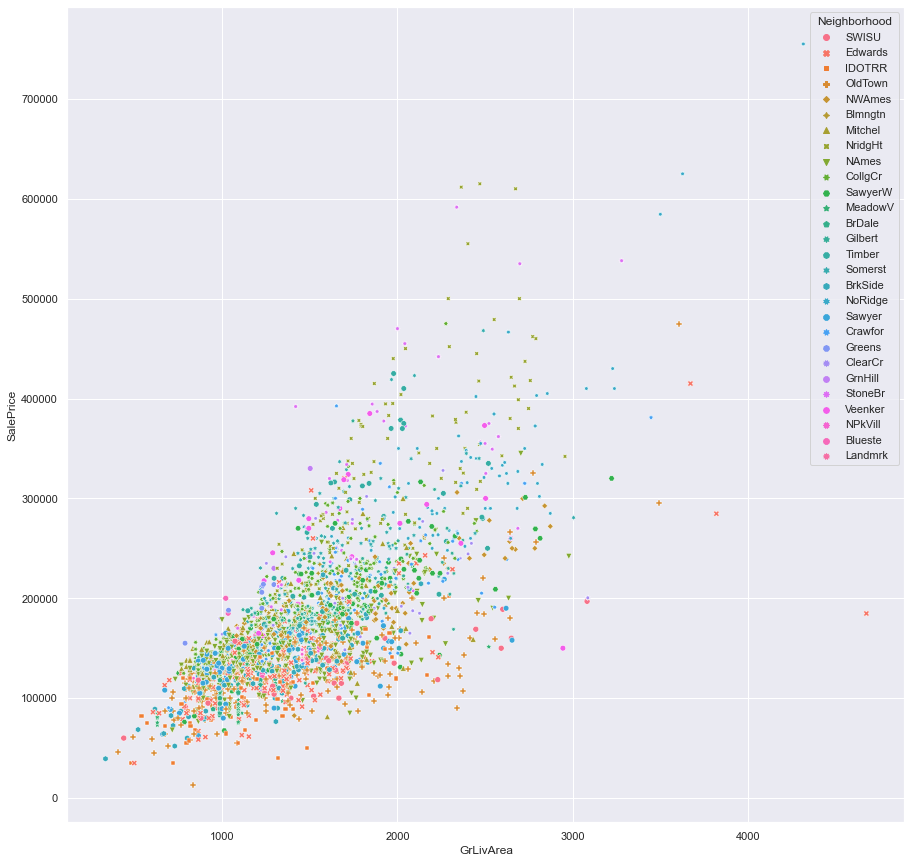

In [151]:
sns.set(rc = {'figure.figsize': (15,15)})
sns.scatterplot(data = HousePrice, x = "GrLivArea", y = "SalePrice", 
                hue = "Neighborhood",
                style = "Neighborhood")

<AxesSubplot:>

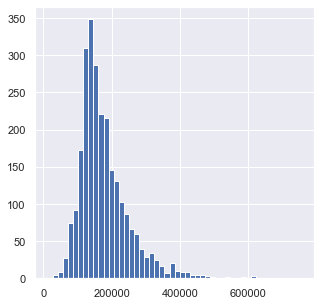

In [156]:
HousePrice['SalePrice'].hist(figsize = (5,5), bins = 50) #data transformation is needed

In [35]:
sns.set(rc = {'figure.figsize': (300,150)})
ax = sns.boxplot(x = "Neighborhood", y = "SalePrice", data = HousePrice)
ax.tick_params(labelsize = 300, labelrotation = 90)
plt.yticks(rotation = 0)
#plt.setp(ax.get_legend().get_texts(), fontsize='200') # for legend text
#plt.setp(ax.get_legend().get_title(), fontsize='250') # for legend title


(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

In [36]:
HousePrice.head(5)

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [42]:
realestate.loc[realestate.duplicated(['MapRefNo','Prop_Addr','ClassPr_S'], keep = False), ]

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
43,522105010,522105010,0,0,1407 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1407,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
44,522105010,522105010,0,0,1407 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1407,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,4.0
54,522105110,522105110,0,0,1711 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1711,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
55,522105110,522105110,0,0,1711 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1711,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
56,522105120,522105120,0,0,1717 LEDGES DR,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,1717,NaN,LEDGES,DR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21584,914452190,914452190,0,0,302 OPAL CIR,RL,NaN,NaN,NaN,RESIDENTIAL,...,302,NaN,OPAL,CIR,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,3.0
22039,923225390,923225390,0,0,540 MEADOW CT,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,540,NaN,MEADOW,CT,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
22040,923225390,923225390,0,0,540 MEADOW CT,F-PRD,NaN,NaN,NaN,RESIDENTIAL,...,540,NaN,MEADOW,CT,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,2.0
22170,1007350045,1007350041,0,0,1418 S DAYTON PL,HOC,NaN,O-GSE,NaN,COMMERCIAL,...,1418,S,DAYTON,PL,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [46]:
pd.merge(realestate[['MapRefNo', 'Prop_Addr']], HousePrice, left_on = 'MapRefNo', 
                                                             right_on = "PID", 
         how = 'right')

KeyError: 'MapRefNo'